
## Лабораторная работа №1 Гистограммы и пиксельная обработка



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Часть 1. Простые расчеты

##* С помощью ручки и бумаги выполните следующие задачи, и визуализируйте их в Python:
**Задание 1:** Учитывая следующее изображение:

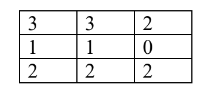

- Рассчитать и нарисовать гистограмму, нормализованную гистограмму (доля пикселей) изображения I.
- Вычислить и отобразить негативный образ I.
- Получить изображения и визуализировать их любым способом (например, через Matplotlib или Pillow)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

I = np.array([
    [3, 3, 2],
    [1, 1, 0],
    [2, 2, 2]
])

print("Исходное изображение I:")
print(I)

Исходное изображение I:
[[3 3 2]
 [1 1 0]
 [2 2 2]]


In [ ]:
values, counts = np.unique(I, return_counts=True)
print(f"\nГистограмма:")
for val, count in zip(values, counts):
    print(f"Значение {val}: {count} пикселей")


Гистограмма:
Значение 0: 1 пикселей
Значение 1: 2 пикселей
Значение 2: 4 пикселей
Значение 3: 2 пикселей


In [ ]:
total_pixels = I.size
normalized_counts = counts / total_pixels
print(f"\nНормализованная гистограмма (доля пикселей):")
for val, norm_count in zip(values, normalized_counts):
    print(f"Значение {val}: {norm_count:.3f} ({norm_count*100:.1f}%)")


Нормализованная гистограмма (доля пикселей):
Значение 0: 0.111 (11.1%)
Значение 1: 0.222 (22.2%)
Значение 2: 0.444 (44.4%)
Значение 3: 0.222 (22.2%)


In [ ]:
max_value = np.max(I)
I_negative = max_value - I
print(f"\nНегативный образ (максимум = {max_value}):")
print(I_negative)


Негативный образ (максимум = 3):
[[0 0 1]
 [2 2 3]
 [1 1 1]]


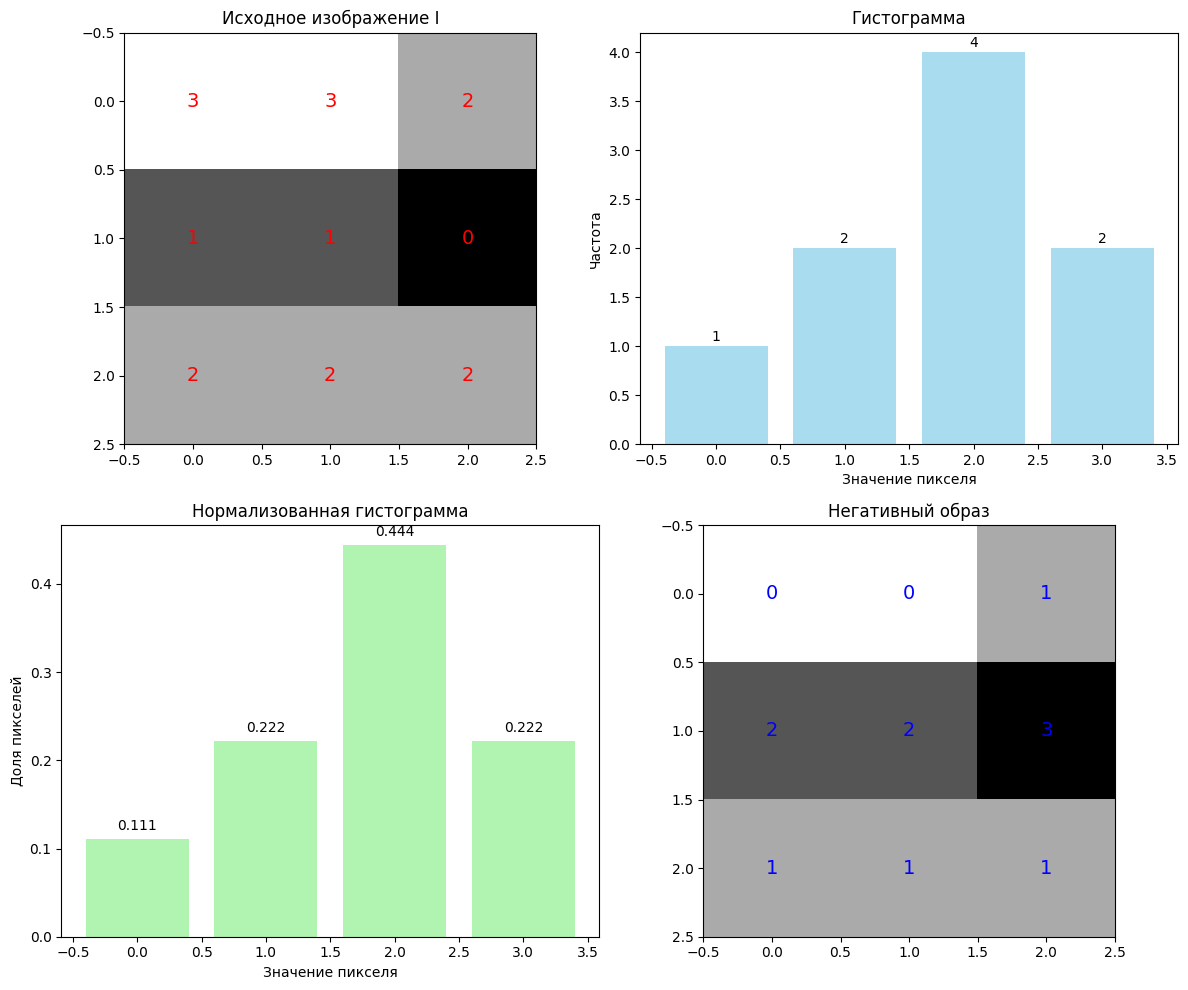

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(I, cmap='gray', vmin=0, vmax=3)
axes[0, 0].set_title('Исходное изображение I')
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        axes[0, 0].text(j, i, I[i, j], ha='center', va='center', color='red', fontsize=14)

axes[0, 1].bar(values, counts, color='skyblue', alpha=0.7)
axes[0, 1].set_title('Гистограмма')
axes[0, 1].set_xlabel('Значение пикселя')
axes[0, 1].set_ylabel('Частота')
for i, v in enumerate(counts):
    axes[0, 1].text(values[i], v + 0.05, str(v), ha='center')

axes[1, 0].bar(values, normalized_counts, color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Нормализованная гистограмма')
axes[1, 0].set_xlabel('Значение пикселя')
axes[1, 0].set_ylabel('Доля пикселей')
for i, v in enumerate(normalized_counts):
    axes[1, 0].text(values[i], v + 0.01, f'{v:.3f}', ha='center')

axes[1, 1].imshow(I_negative, cmap='gray_r', vmin=0, vmax=3)
axes[1, 1].set_title('Негативный образ')
for i in range(I_negative.shape[0]):
    for j in range(I_negative.shape[1]):
        axes[1, 1].text(j, i, I_negative[i, j], ha='center', va='center', color='blue', fontsize=14)

plt.tight_layout()
plt.show()

**Задание 2:** Учитывая следующее изображение J:

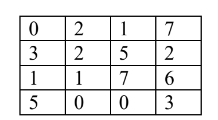

- Рассчитать и нарисовать гистограмму, нормализованную гистограмму изображения J.
- Преобразуйте изображение J в двоичное изображение под названием B, используя метод определения порога, где заранее определенный порог k — это пиксель, который появляется на изображении с наибольшей частотой.
- Визуализируйте полученные результаты.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

J = np.array([
    [0, 2, 1, 7],
    [3, 2, 5, 2],
    [1, 1, 7, 6],
    [5, 0, 0, 3]
])

print("Исходное изображение J:")
print(J)

Исходное изображение J:
[[0 2 1 7]
 [3 2 5 2]
 [1 1 7 6]
 [5 0 0 3]]


In [ ]:
values, counts = np.unique(J, return_counts=True)
print(f"\nГистограмма:")
for val, count in zip(values, counts):
    print(f"Значение {val}: {count} пикселей")


Гистограмма:
Значение 0: 3 пикселей
Значение 1: 3 пикселей
Значение 2: 3 пикселей
Значение 3: 2 пикселей
Значение 5: 2 пикселей
Значение 6: 1 пикселей
Значение 7: 2 пикселей


In [ ]:
total_pixels = J.size
normalized_counts = counts / total_pixels
print(f"\nНормализованная гистограмма (доля пикселей):")
for val, norm_count in zip(values, normalized_counts):
    print(f"Значение {val}: {norm_count:.3f} ({norm_count*100:.1f}%)")



Нормализованная гистограмма (доля пикселей):
Значение 0: 0.188 (18.8%)
Значение 1: 0.188 (18.8%)
Значение 2: 0.188 (18.8%)
Значение 3: 0.125 (12.5%)
Значение 5: 0.125 (12.5%)
Значение 6: 0.062 (6.2%)
Значение 7: 0.125 (12.5%)


In [ ]:
max_freq_index = np.argmax(counts)
k = values[max_freq_index]
max_freq = counts[max_freq_index]
print(f"\nПорог k: {k} (появляется {max_freq} раз, {max_freq/total_pixels*100:.1f}%)")



Порог k: 0 (появляется 3 раз, 18.8%)


In [ ]:
B = (J >= k).astype(int)
print(f"\nДвоичное изображение B (порог k={k}):")
print(B)


Двоичное изображение B (порог k=0):
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


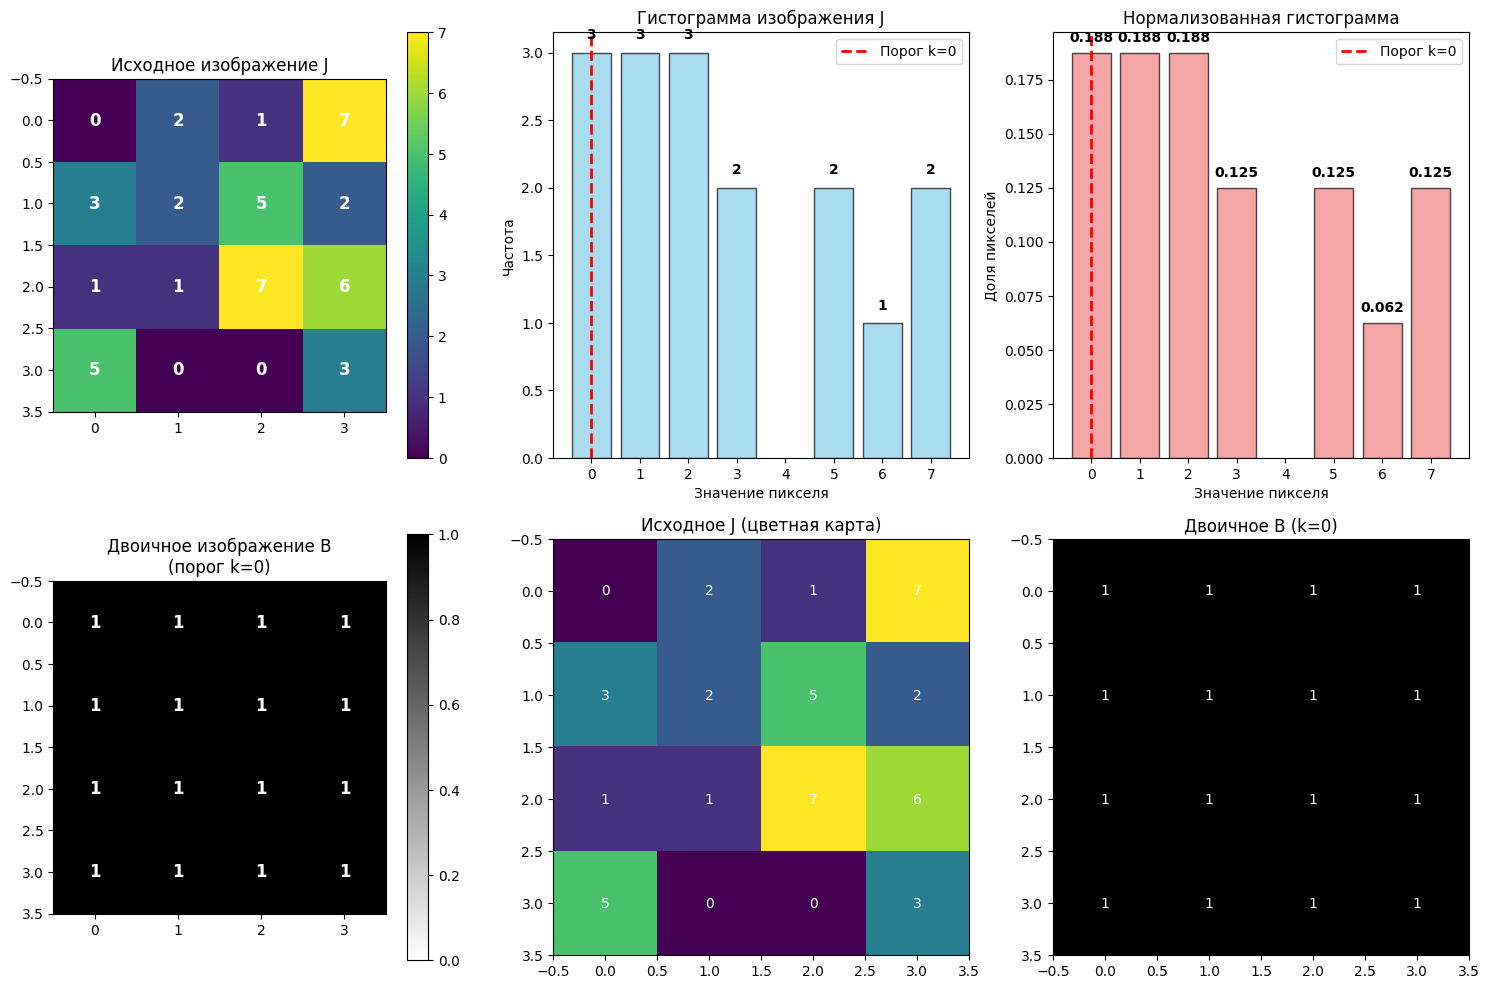

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

im0 = axes[0, 0].imshow(J, cmap='viridis', vmin=0, vmax=7)
axes[0, 0].set_title('Исходное изображение J')
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        axes[0, 0].text(j, i, J[i, j], ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.colorbar(im0, ax=axes[0, 0])

axes[0, 1].bar(values, counts, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Гистограмма изображения J')
axes[0, 1].set_xlabel('Значение пикселя')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].axvline(x=k, color='red', linestyle='--', linewidth=2, label=f'Порог k={k}')
axes[0, 1].legend()
for i, v in enumerate(counts):
    axes[0, 1].text(values[i], v + 0.1, str(v), ha='center', fontweight='bold')

axes[0, 2].bar(values, normalized_counts, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Нормализованная гистограмма')
axes[0, 2].set_xlabel('Значение пикселя')
axes[0, 2].set_ylabel('Доля пикселей')
axes[0, 2].axvline(x=k, color='red', linestyle='--', linewidth=2, label=f'Порог k={k}')
axes[0, 2].legend()
for i, v in enumerate(normalized_counts):
    axes[0, 2].text(values[i], v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')

im3 = axes[1, 0].imshow(B, cmap='binary', vmin=0, vmax=1)
axes[1, 0].set_title(f'Двоичное изображение B\n(порог k={k})')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        axes[1, 0].text(j, i, B[i, j], ha='center', va='center',
                       color='white' if B[i, j] == 1 else 'black',
                       fontsize=12, fontweight='bold')
plt.colorbar(im3, ax=axes[1, 0])


axes[1, 1].imshow(J, cmap='viridis', vmin=0, vmax=7)
axes[1, 1].set_title('Исходное J (цветная карта)')
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        axes[1, 1].text(j, i, J[i, j], ha='center', va='center', color='white', fontsize=10)

axes[1, 2].imshow(B, cmap='binary', vmin=0, vmax=1)
axes[1, 2].set_title(f'Двоичное B (k={k})')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        axes[1, 2].text(j, i, '1' if B[i, j] == 1 else '0', ha='center', va='center',
                       color='white' if B[i, j] == 1 else 'black', fontsize=10)

plt.tight_layout()
plt.show()

**Задание 3:** Учитывая следующее изображение M:

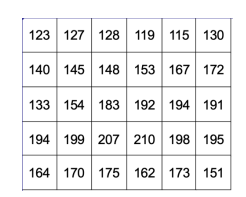

- Рассчитать и нарисовать гистограмму, нормализованную гистограмму изображения М.
- Рассчитайте и нарисуйте выровненную гистограмму на основе изображения M, используя отношение кумулятивной гистограммы к суммарной. Из уточненной гистограммы выводится новое изображение под названием N (https://coderlessons.com/tutorials/akademicheskii/tsifrovaia-obrabotka-izobrazhenii/vyravnivanie-gistogrammy).
- Преобразуйте изображение M в двоичное изображение под названием B, используя метод определения порога, где предопределенный порог k является медианой пикселей изображения M.
- Визуализируйте полученные результаты.

In [ ]:
a = np.array([
    [123, 127, 128, 119, 115, 130],
    [140, 145, 148, 153, 167, 172],
    [133, 154, 183, 192, 194, 191],
    [194, 199, 207, 210, 198, 195],
    [164, 170, 175, 162, 173, 151]
])


Уникальные значения: [115 119 123 127 128 130 133 140 145 148 151 153 154 162 164 167 170 172
 173 175 183 191 192 194 195 198 199 207 210]
Количество повторений: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


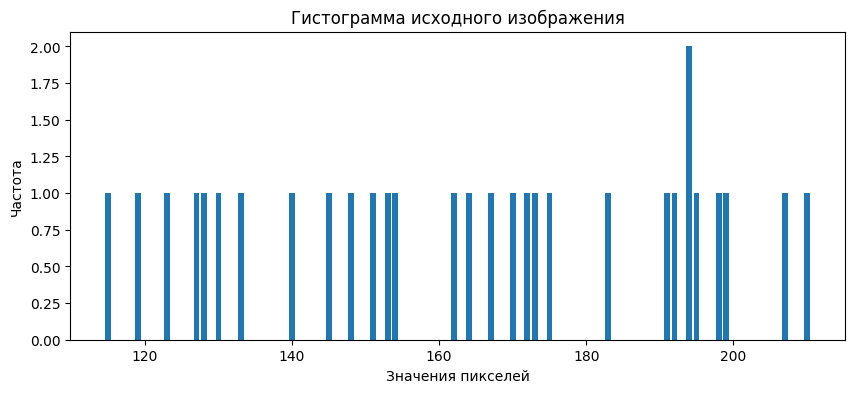

Нормализованные частоты: [0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.06666667
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]
Кумулятивная функция распределения (CDF): [0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.83333333
 0.86666667 0.9        0.93333333 0.96666667 1.        ]
Количество уникальных уровней: 29
Новые уровни: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 13 14 15 16 17 18 19 20 21 23
 24 25 26 27 27]
Исходное изображение:
[[123 127 128 119 115 130]
 [140 145 148 153 167 172]
 [133 154 183 192 194 191]
 [194 199 207 210 198 195]
 [164 170 175 162 173 151]]
********

In [ ]:
uniq_values, counts = np.unique(a, return_counts=True)
print("Уникальные значения:", uniq_values)
print("Количество повторений:", counts)

plt.figure(figsize=(10, 4))
plt.bar(uniq_values, counts)
plt.title('Гистограмма исходного изображения')
plt.xlabel('Значения пикселей')
plt.ylabel('Частота')
plt.show()

df = counts / a.size
print("Нормализованные частоты:", df)

cdf = df.cumsum()
print("Кумулятивная функция распределения (CDF):", cdf)

levels = len(uniq_values)
print("Количество уникальных уровней:", levels)

new_levels = (cdf * (levels - 1)).astype('int')
print("Новые уровни:", new_levels)

a_eq = a.copy()
for i in range(len(uniq_values)):
    a_eq[a == uniq_values[i]] = new_levels[i]

print("Исходное изображение:")
print(a)
print('*' * 100)
print("Выровненное изображение:")
print(a_eq)

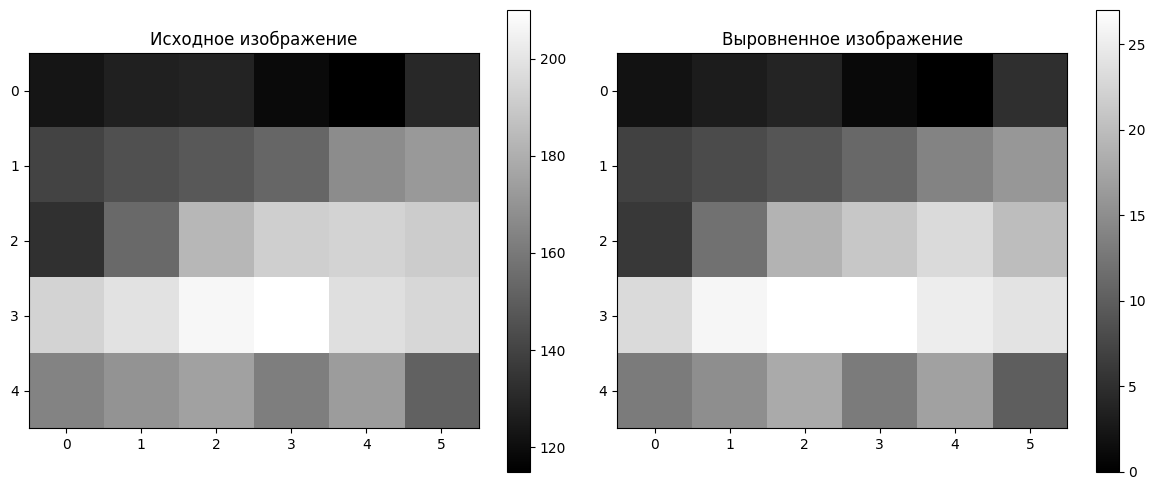

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Исходное изображение')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(a_eq, cmap='gray')
plt.title('Выровненное изображение')
plt.colorbar()

plt.tight_layout()
plt.show()

## Часть 2. Работа с OpenCV

# Ознакомьтесь c документацией (https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)

- Узнайте, как использовать OpenCV с Python в Anaconda.
- Используйте Jupyter Notebook/Google Colab в качестве редактора.
- Загрузите из Интернета несколько изображений в оттенках серого (N > 2), затем выполните следующие задачи по обработке изображений с помощью OpenCV и Python:

**Задание 1:** Прочитайте загруженные изображения с помощью функции `cv2.imread()`, затем отобразите изображения с помощью функции matplotlib `imshow()`

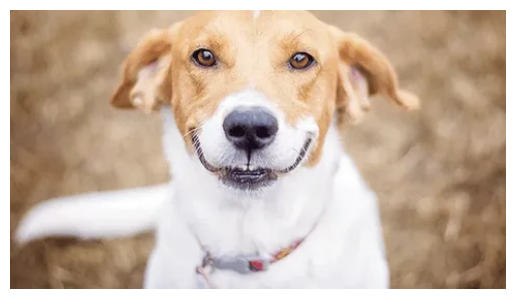

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

**Задание 2.** Измените размер загруженного изображения с помощью функции `cv2.resize()`.

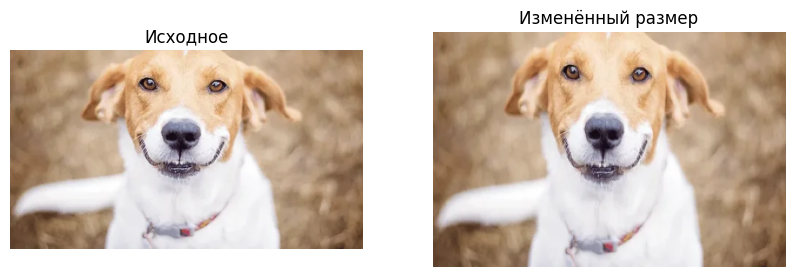

In [ ]:
img_resized = cv2.resize(img_rgb, (300, 200))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_resized)
plt.title('Изменённый размер')
plt.axis('off')

plt.show()

**Задание 3:** Измените яркость загруженного изображения, используя следующую формулу:

$$img_{обработано} = a * f(x, y) + b$$

В котором $f(x, y)$ — исходное изображение $(img)$ в координате $(x, y)$; $a$ и $b$ — определяемые пользователем константы.

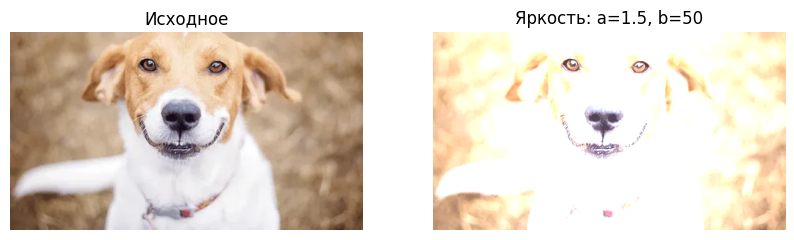

In [ ]:
a = 1.5
b = 50

img_processed = a * img_rgb + b

img_processed = np.clip(img_processed, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_processed)
plt.title(f'Яркость: a={a}, b={b}')
plt.axis('off')

plt.show()

**Задание 4.** Выравнивание гистограммы

- Рассчитайте и отобразите гистограмму исходного изображения, используя функцию `cv2.calcHist()`.
- Используйте функцию cv2.equalizeHist() для расчета нового выравниваемого изображения.
- Отобразите выровненную гистограмму.

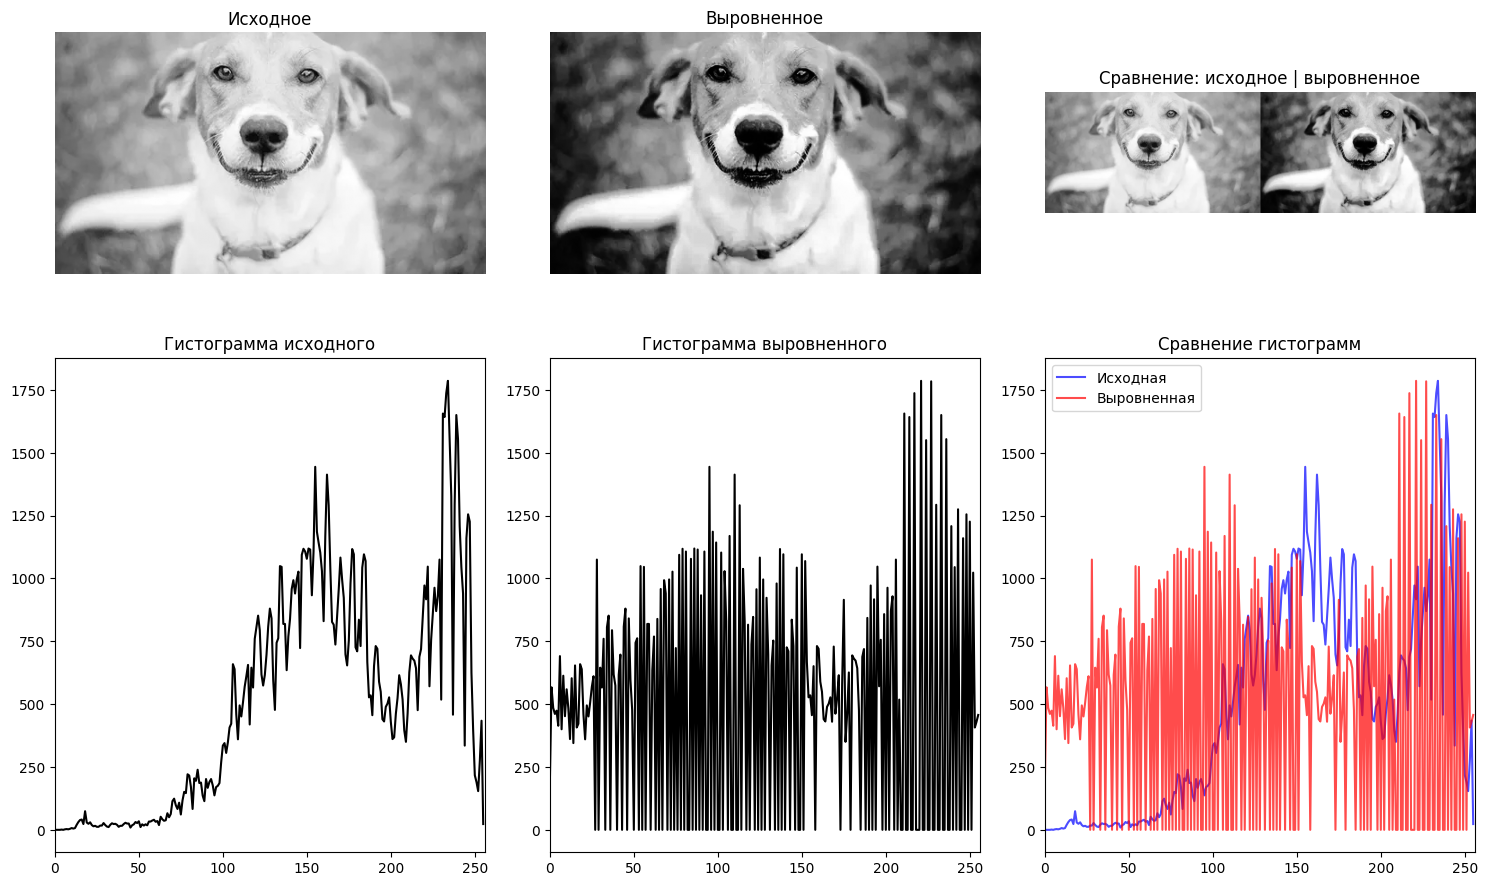

In [ ]:
img = cv2.imread('test.jpg', 0)

img_equalized = cv2.equalizeHist(img)

hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title('Выровненное')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(hist_original, color='black')
plt.title('Гистограмма исходного')
plt.xlim([0, 256])

plt.subplot(2, 3, 5)
plt.plot(hist_equalized, color='black')
plt.title('Гистограмма выровненного')
plt.xlim([0, 256])

plt.subplot(2, 3, 3)
plt.imshow(cv2.hconcat([img, img_equalized]), cmap='gray')
plt.title('Сравнение: исходное | выровненное')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.plot(hist_original, color='blue', alpha=0.7, label='Исходная')
plt.plot(hist_equalized, color='red', alpha=0.7, label='Выровненная')
plt.title('Сравнение гистограмм')
plt.xlim([0, 256])
plt.legend()

plt.tight_layout()
plt.show()

**Задание 5.** Пороговое значение изображения

- Получите изображение и отобразите его на экране. Обратите внимание: если выбрано цветное изображение, перед его отображением вам необходимо будет преобразовать его в оттенки серого (https://www.baeldung.com/cs/convert-rgb-to-grayscale).
- Примените метод глобального порога Нилбака для бинаризации изображения (https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html).
- Отобразите бинаризованное изображение.


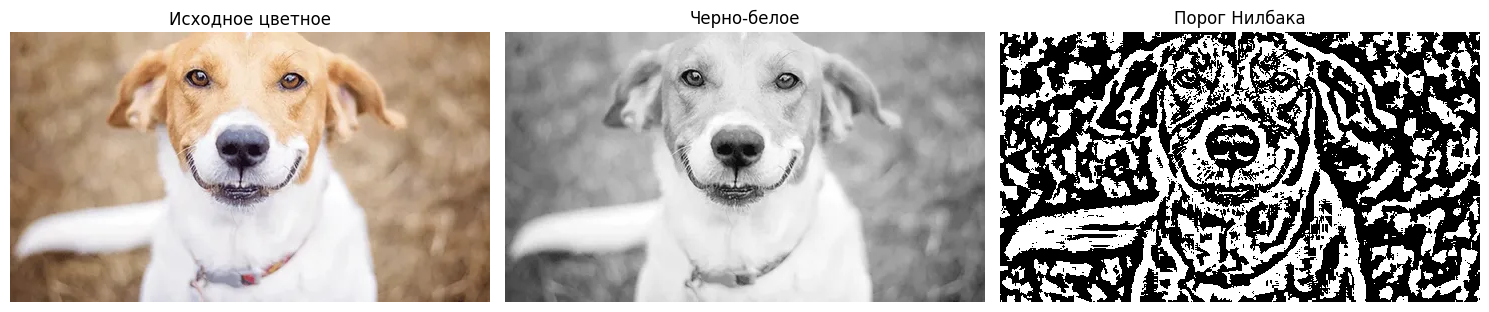

In [ ]:
img = cv2.imread('test.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def niblack_threshold(image, window_size=15, k=0.2):
    border = window_size // 2
    image_padded = cv2.copyMakeBorder(image, border, border, border, border, cv2.BORDER_REFLECT)

    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            window = image_padded[i:i+window_size, j:j+window_size]
            mean = np.mean(window)
            std = np.std(window)

            threshold = mean + k * std
            result[i, j] = 255 if image[i, j] > threshold else 0

    return result


img_binary = niblack_threshold(img_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Исходное цветное')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Черно-белое')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_binary, cmap='gray')
plt.title('Порог Нилбака')
plt.axis('off')

plt.tight_layout()
plt.show()

**Задание 6.** Зашумление изображения

- Наложите на изображение белый шум N ~ (0,5) и выполните визуализацию
- Наложите на изображение импульсный шум N ~ 10 и выполните визуализацию



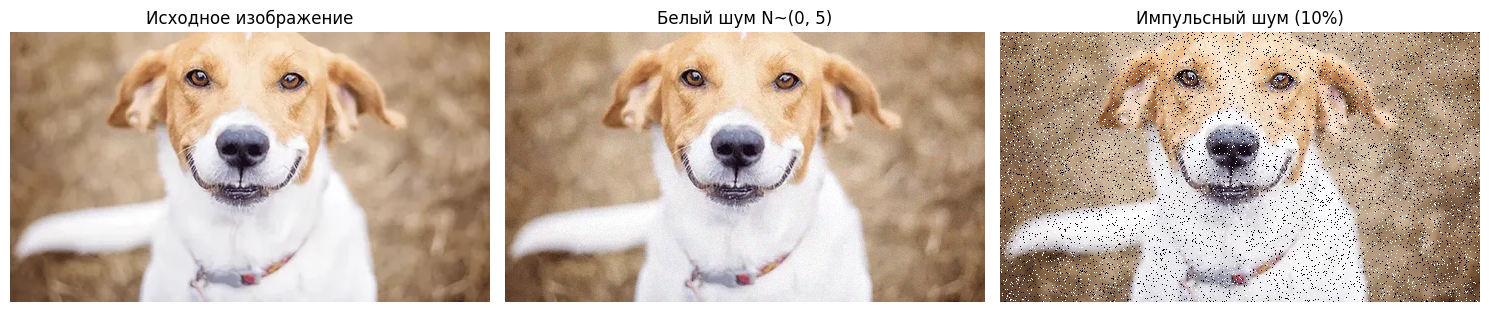

In [ ]:
def add_white_noise(image, mean=0, std=5):
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image, amount=0.1):
    noisy_image = image.copy()
    salt_mask = np.random.random(image.shape[:2]) < amount/2
    noisy_image[salt_mask] = 255
    pepper_mask = np.random.random(image.shape[:2]) < amount/2
    noisy_image[pepper_mask] = 0
    return noisy_image

img_white_noise = add_white_noise(img_rgb)
img_impulse_noise = add_salt_pepper_noise(img_rgb, amount=0.1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_white_noise)
plt.title('Белый шум N~(0, 5)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_impulse_noise)
plt.title('Импульсный шум (10%)')
plt.axis('off')

plt.tight_layout()
plt.show()

##Выводы

Обработка изображений позволяет существенно улучшать их визуальное качество и подготавливать для дальнейшего анализа. Различные методы - выравнивание гистограммы, пороговая обработка и фильтрация шумов - эффективно решают конкретные задачи улучшения контрастности, сегментации и очистки изображений от искажений.

###*Примечание*: вам необходимо загрузить исходные коды с отображенными результатами вашей работы в Campus (ref) или отправить на почту naandriyanov@fa.ru